1

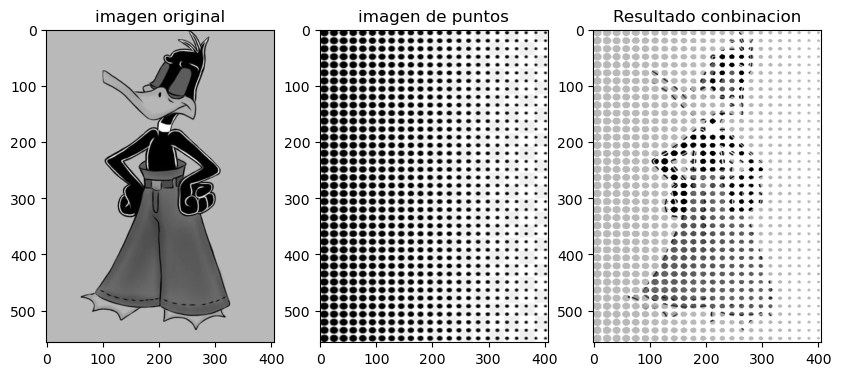

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_pato = cv2.imread('pato.jpg', 0)
puntos_gray = cv2.imread('puntos.png', 0)

altura_pato, ancho_pato = img_pato.shape
altura_puntos, ancho_puntos = puntos_gray.shape

puntos_gray = cv2.resize(puntos_gray, (ancho_pato, altura_pato))
_, img_puntos_bin = cv2.threshold(puntos_gray, 150, 255, cv2.THRESH_BINARY_INV)
img_resultado = cv2.bitwise_and(img_pato, img_pato, mask=img_puntos_bin)

for i in range(altura_pato):
    for j in range(ancho_pato):
        if img_puntos_bin[i, j] == 0:
            img_resultado[i, j] = 255

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(img_pato, cmap='gray')
plt.title('imagen original')

plt.subplot(132)
plt.imshow(puntos_gray, cmap='gray')
plt.title('imagen de puntos')

plt.subplot(133)
plt.imshow(img_resultado, cmap='gray')
plt.title('Resultado conbinacion')

plt.show()

2. cuantos objetos de cada color hay en la imagen

Objetos contados por color:
Rojo: 7
Naranja: 10
Amarillo: 6
Verde: 10
Azul: 7


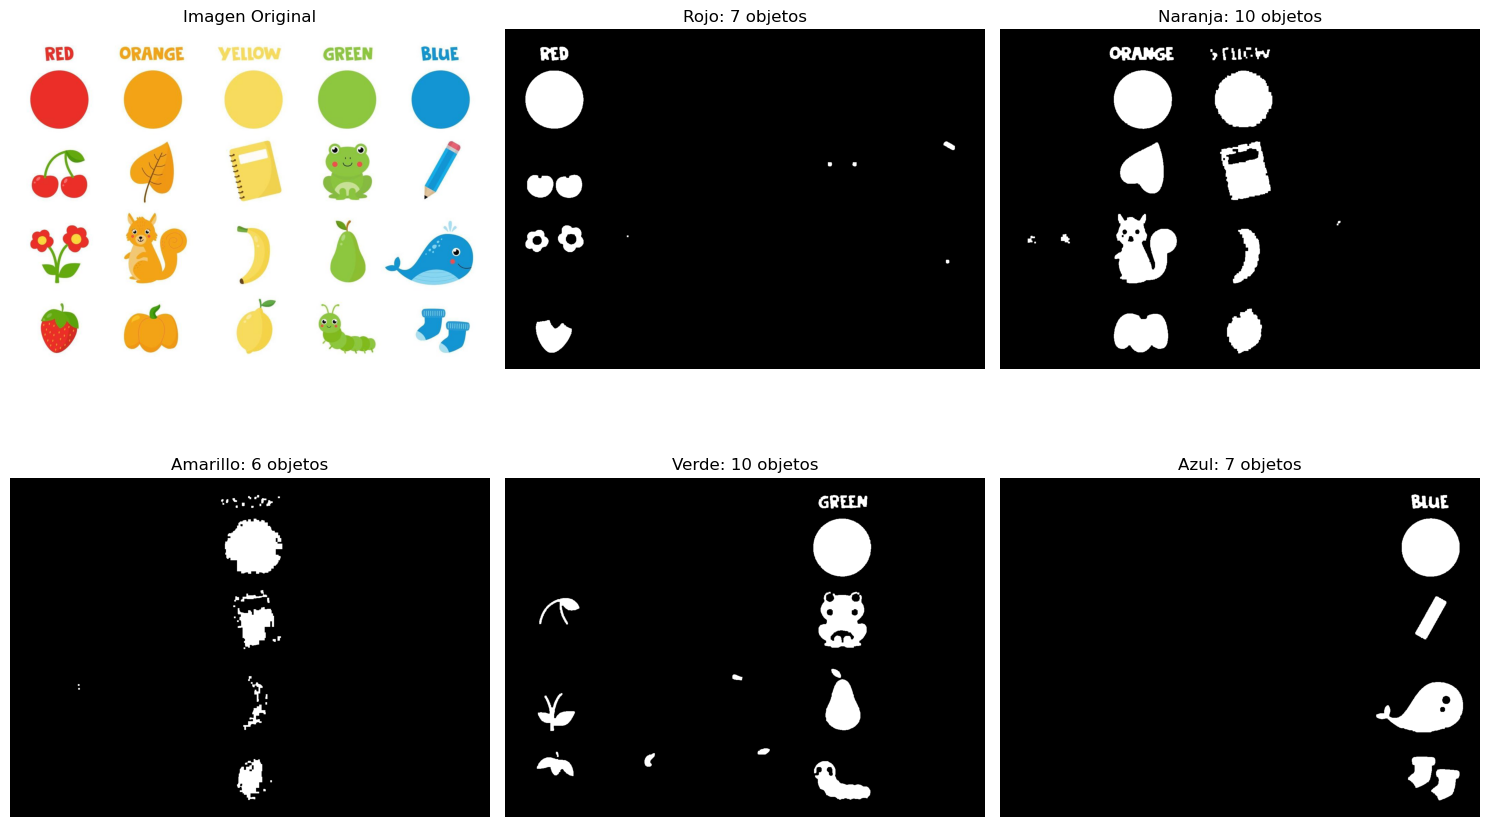

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_by_color(img):
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    color_ranges = {
        'rojo': ([0, 100, 100], [10, 255, 255], [160, 100, 100], [180, 255, 255]),  
        'naranja': ([10, 100, 100], [25, 255, 255]),
        'amarillo': ([25, 100, 100], [35, 255, 255]),
        'verde': ([35, 100, 100], [85, 255, 255]),
        'azul': ([85, 100, 100], [125, 255, 255]),
    }
    
    results = {}
    color_masks = {}
    
    
    for color, ranges in color_ranges.items():
        if color == 'rojo':  
            lower1, upper1, lower2, upper2 = ranges
            mask1 = cv2.inRange(img_hsv, np.array(lower1), np.array(upper1))
            mask2 = cv2.inRange(img_hsv, np.array(lower2), np.array(upper2))
            mask = cv2.bitwise_or(mask1, mask2)
        else:
            lower, upper = ranges
            mask = cv2.inRange(img_hsv, np.array(lower), np.array(upper))
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        
        valid_contours = []
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:  
                valid_contours.append(cnt)
        results[color] = len(valid_contours)
        color_masks[color] = mask
    
    return results, color_masks


imagen = cv2.imread("colores.jpg")


counts, masks = count_by_color(imagen)


print("Objetos contados por color:")
for color, count in counts.items():
    print(f"{color.capitalize()}: {count}")


plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')


colors = ['rojo', 'naranja', 'amarillo', 'verde', 'azul']
for i, color in enumerate(colors):
    plt.subplot(2, 3, i+2)
    plt.title(f"{color.capitalize()}: {counts[color]} objetos")
    plt.imshow(masks[color], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Estás trabajando en un proyecto de reconocimiento de rostros y necesitas detectar los 
bordes de las caras en las imágenes. Explique cómo aplicaría el operador de detección de 
bordes de Canny y aplícalo con un código en Python en jupyter



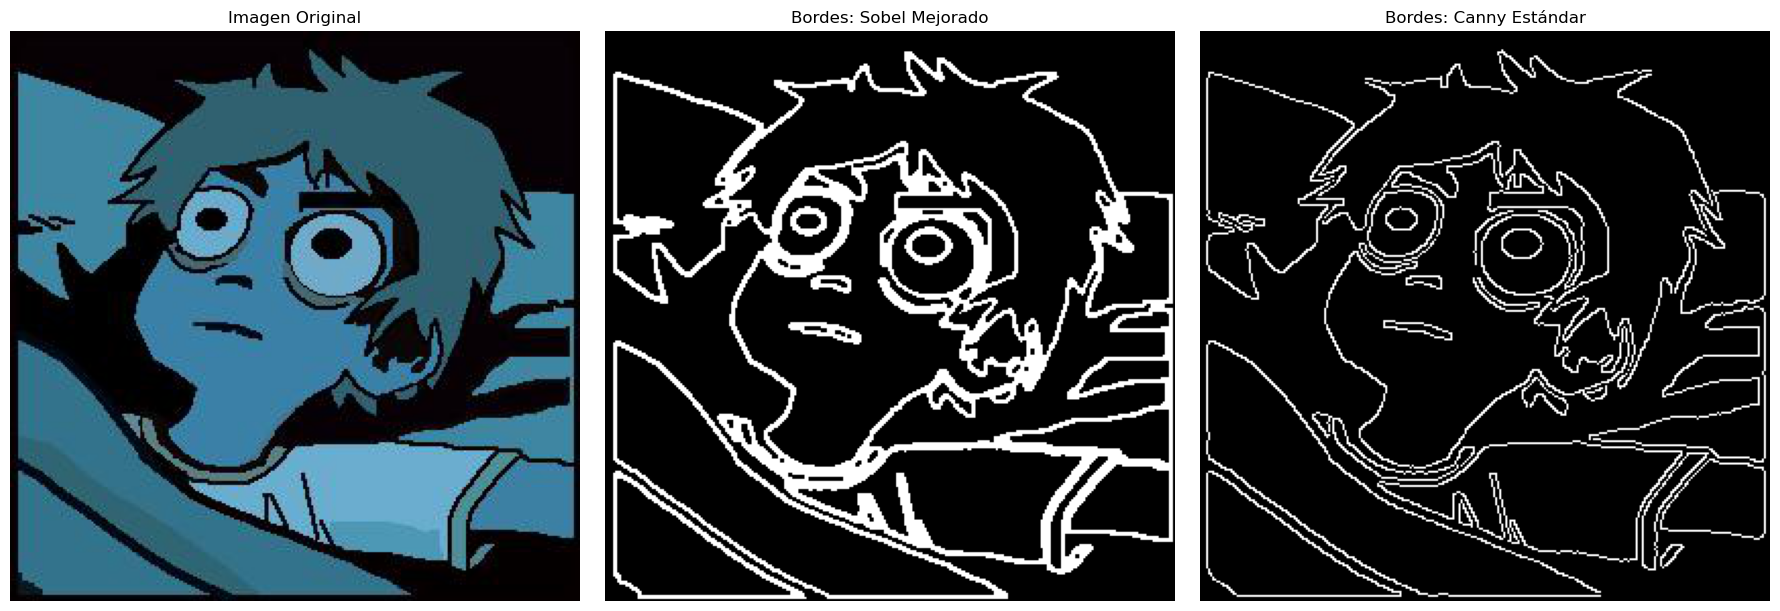

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejorado(img, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)
    sobel_x = cv2.Sobel(suavizado, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sobel_y = cv2.Sobel(suavizado, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitud = cv2.normalize(magnitud, None, 0, 255,
                             cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    
    return bordes
def canny_standard(img, low=100, high=200):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3,3), 0)
    return cv2.Canny(blurred, low, high)

img = cv2.imread('img.jpg')
sobel_edges = sobel_mejorado(img)
canny_edges = canny_standard(img)


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Bordes: Sobel Mejorado')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Bordes: Canny Estándar')
plt.axis('off')

plt.tight_layout()
plt.show()
